In [67]:
#nitsos
# Import required libraries
import os.path
import numpy as np
import pandas as pd 
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
# Import the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

In [68]:
# df_HBB = pd.read_excel("/Users/nitsos/Desktop/computation_nitsos/dataset_analisis/k - mer encoding/HBB.xlsx")
# df_HEXA = pd.read_excel("/Users/nitsos/Desktop/computation_nitsos/dataset_analisis/k - mer encoding/HEXA.xlsx") 

df_HBB = pd.read_excel("HBB.xlsx")
df_HEXA = pd.read_excel("HEXA.xlsx") 

#display(df_HBB, df_HEXA)

In [69]:
# concatenating df_HBB and df_HEXA vertical
vertical_concat = pd.concat([df_HEXA, df_HBB], axis=0)
vertical_concat = vertical_concat.drop('Unnamed: 0', axis=1)
#display(vertical_concat)


In [70]:
# Export to excel
vertical_concat.to_excel('dataset.xlsx')

In [71]:
# df_dataset = pd.read_excel("/Users/nitsos/Desktop/computation_nitsos/dataset_analisis/k - mer encoding/dataset.xlsx")
df_dataset = pd.read_excel("dataset.xlsx")
df_dataset = df_dataset.drop('Spacer sequence', axis=1)
df_dataset = df_dataset.drop('Unnamed: 0', axis=1)
df_dataset.rename(columns={"3' extension":"3extension"}, inplace=True)
df_dataset.rename(columns={"Mean of % correct edit (w/o indels) ":"Mean of correct edit"}, inplace=True)
#display(df_dataset)
print(df_dataset.shape)

(57, 5)


In [72]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
cv = CountVectorizer(ngram_range=(3,3), analyzer='char')
X = cv.fit_transform(df_dataset['3extension'])
# print(X)
# print(type(X))  # <class 'scipy.sparse.csr.csr_matrix'>
#print(X.shape)  # (57, 44)

In [73]:
feature = cv.get_feature_names_out()
# print(type(feature))      # <class 'numpy.ndarray'>
# print(len(feature))       # 44
# feature                   # print feature array

In [74]:
# Print the vocabulary
vocabulary = cv.vocabulary_
# print(type(vocabulary))   # <class 'dict'>
# print(len(vocabulary))    # 44
# display(vocabulary)

In [75]:
# Convert sparse csr matrix to dense format and allow columns to contain the array mapping from feature integer indices to feature names
count_vect_df = pd.DataFrame(X.todense(), columns=cv.get_feature_names_out())
# print(type(count_vect_df))   # <class 'pandas.core.frame.DataFrame'>
# count_vect_df

In [76]:
# Concatenate the original dataframe and the count_vect_df columnwise
df_dataset = pd.concat([df_dataset, count_vect_df], axis=1)
#display(df_dataset)         # 49 column  = 44 + pegRNA + 3extension + PBS + RT + Mean
#print(df_dataset.shape)

In [77]:
# Target variable
y = df_dataset["Mean of correct edit"]

In [101]:
# Feature variables
# Drop the column that will be predicted and assign the features to variable
X = df_dataset.drop(['pegRNA', '3extension', 'Mean of correct edit'], axis = 1)
X                 # 46 column
print(X.shape)    # (57, 46)

X 

(57, 47)


,PBS length,RT template length,aac,aag,acc,acg,act,aga,agg,agt,...,tat,tca,tcc,tct,tga,tgc,tgg,tta,ttc,Predictions
0,13,14,0,0,0,0,1,0,0,0,...,2,0,0,1,1,0,2,1,0,0.780723
1,13,15,0,0,0,0,1,0,0,0,...,3,0,0,1,1,0,2,1,0,0.875329
2,13,16,0,0,0,0,1,0,0,0,...,3,0,0,1,1,0,2,1,0,1.795596
3,13,19,0,0,1,0,1,0,0,0,...,3,0,0,1,1,0,2,1,0,9.665951
4,13,20,1,0,1,0,1,0,0,0,...,3,0,0,1,1,0,2,1,0,10.797804
5,13,21,1,0,1,0,1,0,0,0,...,3,0,0,1,1,0,2,1,0,9.647255
6,13,22,1,0,1,0,1,0,0,0,...,3,0,0,1,2,0,2,1,0,9.584075
7,9,14,0,0,0,0,1,0,0,0,...,2,0,0,1,1,0,1,1,0,2.953487
8,9,15,0,0,0,0,1,0,0,0,...,3,0,0,1,1,0,1,1,0,3.192273
9,9,16,0,0,0,0,1,0,0,0,...,3,0,0,1,1,0,1,1,0,4.461559


<h4>Random Forest Regressor model<h4>

In [79]:
# Import the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

In [80]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [81]:
# print(X_train.shape) # (39, 46)
# print(X_test.shape)  # (18, 46)
# print(y_train.shape) # (39,)
# print(y_test.shape)  # (18,)

In [82]:
# Grid search the Random Forest Regressor
from sklearn.model_selection import GridSearchCV

# Setting the static parameters
rfr = RandomForestRegressor(bootstrap=True, random_state=42, n_jobs=7)

param_grid = dict(n_estimators=[10, 25, 50, 100, 1000],
                  max_depth=[5, 10, 20, 30],
                  min_samples_leaf=[1,2,4])

grid = GridSearchCV(rfr, param_grid, cv=10,
                    scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=7, random_state=42),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 25, 50, 100, 1000]},
             scoring='neg_mean_squared_error')

In [83]:
#find the grid parameters
print("grid.best_params_ {}".format(grid.best_params_))
print("grid.best_estimator_ {}".format(grid.best_estimator_)) 

grid.best_params_ {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 1000}
grid.best_estimator_ RandomForestRegressor(max_depth=20, n_estimators=1000, n_jobs=7,
                      random_state=42)


In [84]:
# Instantiate model with grid search parameters
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,#max_depth=30
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=7, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [85]:
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=1000, n_jobs=7,
                      random_state=42)

In [86]:
# Use the forest's predict method on the test data
predictions = rf.predict(X)
#print(type(predictions))           # <class 'numpy.ndarray'>
predictions_list = predictions.tolist()
#print(predictions_list)

In [87]:
# Place predictions in the dataframe
df_dataset['Mean of correct edit'] = df_dataset['Mean of correct edit']
df_dataset['Predictions'] = pd.DataFrame(data=predictions)

#print(df_dataset['Mean of correct edit'])
#print(type(df_dataset['Mean of correct edit']))          # <class 'pandas.core.series.Series'>

# Convert the series to a list
df_dataset_Mean_of_correct_edit_to_list = df_dataset['Mean of correct edit'].tolist()
#print(type(df5_Mean_of_correct_edit_to_list))        # <class 'list'>

In [88]:
results = df_dataset[['Mean of correct edit', 'Predictions']] 
#print(type(results))   #<class 'pandas.core.frame.DataFrame'>
#results

In [89]:
import xlrd 
import numpy as np
import seaborn
import numpy as np
import matplotlib.pyplot as matplotlib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
 
# set seed to make results reproducible
RF_SEED = 30

import seaborn
import numpy as np
import matplotlib.pyplot as matplotlib
 
from matplotlib.lines import Line2D
 
 
def simple_scatter_plot(x_data, y_data, output_filename, title_name, x_axis_label, y_axis_label):
    """Simple scatter plot. 
    Args:
    x_data (list): List with x-axis data.
    y_data (list): List with y-axis data.
    output_filename (str): Path to output image in PNG format.
    title_name (int): Plot title.
    x_axis_label (str): X-axis Label.
    y_axis_label (str): Y-axis Label.
    """
    seaborn.set(color_codes=True)
    matplotlib.figure(1, figsize=(9, 6))
    matplotlib.title(title_name)
 
    ax = seaborn.scatterplot(x=x_data, y=y_data)
    ax.set(xlabel=x_axis_label, ylabel=y_axis_label)
 
    matplotlib.savefig(output_filename, bbox_inches='tight', dpi=300)

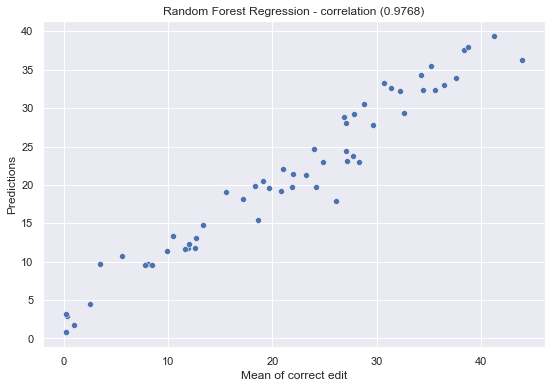

In [90]:
# find the correlation between real answer and prediction
#correlation = round(pearsonr(predictions, x_test_labels)[0], 5)
 
import matplotlib.pyplot as matplotlib    
x_test_labels = df_dataset_Mean_of_correct_edit_to_list
# find the correlation between real answer and prediction
correlation = round(pearsonr(predictions, x_test_labels)[0], 5)
#print("correlation = ", correlation)

output_filename = "rf_regression.png"
title_name = "Random Forest Regression - correlation ({})".format(correlation)
x_axis_label = "Mean of correct edit"
y_axis_label = "Predictions"

predictions = predictions_list 
 


# plot data
simple_scatter_plot(x_test_labels, predictions, output_filename, title_name, x_axis_label, y_axis_label)


In [148]:
# Print the actual values and the model's predictions
# results

In [91]:
import sklearn.metrics as metrics

# Calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(df_dataset['Mean of correct edit'],predictions))
print(metrics.mean_squared_error(df_dataset['Mean of correct edit'], predictions))
print(np.sqrt(metrics.mean_squared_error(df_dataset['Mean of correct edit'], predictions)))

2.126890039421075
7.7293996530757205
2.780179787905041


<h4> Implementation RF on the TP53 substitiution <h4> 

In [175]:
#for this purpose i start the Random_Forest.ipynb but temporary i use the k_mer_encoding
fullpath_NGG_exel = os.path.abspath('C:/Users/nitsos/Desktop/computation_nitsos/dataset_analisis/TP53_gene/3_extension_TP53_exon6_substitution_for_closer_NGG.xls')
fullpath_CCN_exel = os.path.abspath('C:/Users/nitsos/Desktop/computation_nitsos/dataset_analisis/TP53_gene/3_extension_TP53_exon6_substitution_for_closer_CCN.xls')

# Read TP53 substitution for NGG or CCN file
df_NGG = pd.read_excel(fullpath_NGG_exel)
df_CCN = pd.read_excel(fullpath_CCN_exel)
#df_NGG
df_CCN
#Unnamed:0    Names     PBS length     RT template length     3_extension

,Unnamed: 0,Names,PBS length,RT template length,3_extension
0,1,TP53 1,9,12,TGAGCCTATTgTGGAAGGAAA
1,2,TP53 2,9,13,TGAGCCTATTgTAGGAAGGAAA
2,3,TP53 3,9,14,TGAGCCTATTgTACGGAAGGAAA
3,4,TP53 4,9,15,TGAGCCTATTgTACGGGAAGGAAA
4,5,TP53 5,9,16,TGAGCCTATTgTACGAGGAAGGAAA
5,6,TP53 6,9,17,TGAGCCTATTgTACGACGGAAGGAAA
6,7,TP53 7,10,12,TGAGCCTATTgTGGAAGGAAAT
7,8,TP53 8,10,13,TGAGCCTATTgTAGGAAGGAAAT
8,9,TP53 9,10,14,TGAGCCTATTgTACGGAAGGAAAT
9,10,TP53 10,10,15,TGAGCCTATTgTACGGGAAGGAAAT


In [176]:
# df_NGG = df_NGG.drop('Names', axis=1)
# df_NGG = df_NGG.drop('Unnamed: 0', axis=1)

df_CCN = df_CCN.drop('Names', axis=1)
df_CCN = df_CCN.drop('Unnamed: 0', axis=1)


In [177]:
# df_NGG

df_CCN

,PBS length,RT template length,3_extension
0,9,12,TGAGCCTATTgTGGAAGGAAA
1,9,13,TGAGCCTATTgTAGGAAGGAAA
2,9,14,TGAGCCTATTgTACGGAAGGAAA
3,9,15,TGAGCCTATTgTACGGGAAGGAAA
4,9,16,TGAGCCTATTgTACGAGGAAGGAAA
5,9,17,TGAGCCTATTgTACGACGGAAGGAAA
6,10,12,TGAGCCTATTgTGGAAGGAAAT
7,10,13,TGAGCCTATTgTAGGAAGGAAAT
8,10,14,TGAGCCTATTgTACGGAAGGAAAT
9,10,15,TGAGCCTATTgTACGGGAAGGAAAT


In [178]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# X2 = cv.transform(df_NGG['3_extension'])
# print(X2.shape)  


X2 = cv.transform(df_CCN['3_extension'])
print(X2.shape)  

(42, 44)


In [179]:
print(len(cv.get_feature_names_out()))

44


In [180]:
print(X2.todense())

[[0 1 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [181]:
print((X2.todense()).shape)

(42, 44)


In [182]:
# Convert sparse csr matrix to dense format and allow columns to contain the array mapping from feature integer indices to feature names
count_vect_df2 = pd.DataFrame(X2.todense(), columns=cv.get_feature_names_out())
count_vect_df2
print(len(count_vect_df2))

42


In [183]:
# Concatenate the original dataframe and the count_vect_df columnwise
# df_ngg = pd.concat([df_NGG, count_vect_df2], axis=1)
# print(df_ngg.shape) 


df_ccn = pd.concat([df_CCN, count_vect_df2], axis=1)
print(df_ccn.shape) 

(42, 47)


In [184]:
df_ccn

,PBS length,RT template length,3_extension,aac,aag,acc,acg,act,aga,agg,...,tac,tat,tca,tcc,tct,tga,tgc,tgg,tta,ttc
0,9,12,TGAGCCTATTgTGGAAGGAAA,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,9,13,TGAGCCTATTgTAGGAAGGAAA,0,1,0,0,0,0,2,...,0,1,0,0,0,1,0,0,0,0
2,9,14,TGAGCCTATTgTACGGAAGGAAA,0,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,0,0
3,9,15,TGAGCCTATTgTACGGGAAGGAAA,0,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,0,0
4,9,16,TGAGCCTATTgTACGAGGAAGGAAA,0,1,0,1,0,0,2,...,1,1,0,0,0,1,0,0,0,0
5,9,17,TGAGCCTATTgTACGACGGAAGGAAA,0,1,0,2,0,0,1,...,1,1,0,0,0,1,0,0,0,0
6,10,12,TGAGCCTATTgTGGAAGGAAAT,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
7,10,13,TGAGCCTATTgTAGGAAGGAAAT,0,1,0,0,0,0,2,...,0,1,0,0,0,1,0,0,0,0
8,10,14,TGAGCCTATTgTACGGAAGGAAAT,0,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,0,0
9,10,15,TGAGCCTATTgTACGGGAAGGAAAT,0,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,0,0


In [185]:
#Delete string column
# df_ngg = df_ngg.drop('3_extension', axis=1)

df_ccn = df_ccn.drop('3_extension', axis=1)

In [186]:
# df_ngg

df_ccn


,PBS length,RT template length,aac,aag,acc,acg,act,aga,agg,agt,...,tac,tat,tca,tcc,tct,tga,tgc,tgg,tta,ttc
0,9,12,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,9,13,0,1,0,0,0,0,2,0,...,0,1,0,0,0,1,0,0,0,0
2,9,14,0,1,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0
3,9,15,0,1,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0
4,9,16,0,1,0,1,0,0,2,0,...,1,1,0,0,0,1,0,0,0,0
5,9,17,0,1,0,2,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0
6,10,12,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
7,10,13,0,1,0,0,0,0,2,0,...,0,1,0,0,0,1,0,0,0,0
8,10,14,0,1,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0
9,10,15,0,1,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0


In [187]:

# print(df_ngg.shape) 

print(df_ccn.shape) 


(42, 46)


In [188]:
# Use the forest's predict method on the test data
# predictions_ins = rf.predict(df_ngg)

predictions_ins = rf.predict(df_ccn)

In [189]:
# Place predictions in new columns
# df_ngg['rfr predictions'] = predictions_ins
# df_ngg['rfr predictions']

df_ccn['rfr predictions'] = predictions_ins
df_ccn['rfr predictions']

0      8.362615
1      9.078677
2      7.809283
3      7.805204
4      9.378943
5      8.474141
6      8.488910
7      9.217693
8      7.938390
9      7.934312
10     9.517780
11     8.662625
12     8.459746
13     9.170314
14     7.891012
15     7.886933
16     9.444426
17     8.588608
18     8.513794
19     9.211913
20     7.912374
21     7.908295
22     9.471029
23     8.599367
24     9.434313
25    10.070843
26     8.736553
27     8.726229
28    10.163785
29     9.330631
30    10.465847
31    11.071675
32     9.705422
33     9.706836
34    11.142139
35    10.292754
36    10.456615
37    11.072222
38     9.705969
39     9.707383
40    11.142825
41    10.289611
Name: rfr predictions, dtype: float64

In [191]:
# Write predictions to excel
# df_ngg.to_excel('df_ngg_predictions.xlsx')

df_ccn.to_excel('df_ccn_predictions.xlsx')